# Storm Damage Analysis
## Data cleaning and EDA

### This script performs data cleaning and EDA for Career Foundry's Achievement 6
#### 0 Introduction
Brief description of the dataset and project goals.

#### 1 Setup
Load necessary Python libraries (e.g., pandas, numpy, matplotlib, seaborn).

#### 2️ Load and Inspect Data
Load all CSV files (2020-2024).

Display column names, data types, and sample records to understand structure.

#### 3 Data cleaning

Ensure event IDs are unique (events counted only once).

Append datasets into single dataframe.

Remove duplicates.

Convert data types (e.g., dates, numerical fields).

Validate the completeness of key fields (e.g., STATE, EVENT_TYPE).

Standardize categorical values (e.g., ensure "HAIL" is consistently labeled).

Generate a data profile.

#### 4 Exploratory data analysis (EDA)
Count and visualize hail events by state and month.

Identify the top states with frequent related storm events.


#### 5 Save cleaned data
Export the final cleaned dataset as a CSV for further analysis.

---------------------------------------------------------------------------------------------------


# 0 Introduction
### Scenario
HailMary Roofing Company, LLC is looking to expand their business into new states. Repair and replacement from hail damage is their specialty and makes up a significant portion of their business. They've hired a data analyst to identify the best US states for their new roofing teams.

### Summary
The NOAA Storm Events Database is a comprehensive dataset maintained by the National Oceanic and Atmospheric Administration (NOAA). It records severe weather events across the United States, including hail, tornadoes, floods, and other significant storms. The dataset provides detailed event information, such as date, location (state and county), event magnitude (e.g., hail size), and reported damages. With data spanning multiple years, it serves as a valuable resource for analyzing historical weather patterns and assessing the frequency and impact of severe storms.
The NOAA Storm Events Database was chosen for this analysis because it provides detailed records of hail events across the United States. Hail damage is a major driver of roofing repairs and replacements, making this dataset highly relevant to identifying expansion opportunities for the roofing company. The dataset includes state- and county-level geographic data, allowing for targeted analysis of high-risk areas. Additionally, its historical coverage enables trend analysis to identify regions with consistent hail activity, helping the company make informed business decisions about where to expand.


# 1 Setup

### Import visualization libraries

In [33]:
# Import libraries
import pandas as pd          # Data manipulation
import numpy as np           # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns        # Data visualization
import os                    # File path operations
import sweetviz as sv

In [34]:
# Define path to data folder
data_path = r"C:\Users\nsmith\OneDrive - Georgia Poultry Laboratory Network\CareerFoundry\02 - Data Immersion\Achievement 6\01 Data"

# 2 Load and inspect data

### Define file paths

In [35]:
# Generate file paths for primary datasets (storm data)
primary_2020_path = os.path.join(data_path, "StormEvents_details-ftp_v1.0_d2020.csv.gz")
primary_2021_path = os.path.join(data_path, "StormEvents_details-ftp_v1.0_d2021.csv.gz")
primary_2022_path = os.path.join(data_path, "StormEvents_details-ftp_v1.0_d2022.csv.gz")
primary_2023_path = os.path.join(data_path, "StormEvents_details-ftp_v1.0_d2023.csv.gz")
primary_2024_path = os.path.join(data_path, "StormEvents_details-ftp_v1.0_d2024.csv.gz")

In [36]:
# Generate file paths for primary dataset (housing data)
housing_path = os.path.join(data_path, "CensusBureauACS_dirty.csv")

### Load data

In [37]:
# Load primary datasets (storm data)
primary_2020 = pd.read_csv(primary_2020_path, compression='gzip')
primary_2021 = pd.read_csv(primary_2021_path, compression='gzip')
primary_2022 = pd.read_csv(primary_2022_path, compression='gzip')
primary_2023 = pd.read_csv(primary_2023_path, compression='gzip')
primary_2024 = pd.read_csv(primary_2024_path, compression='gzip')

In [38]:
# Load primary dataset (housing data)
housing_df = pd.read_csv(housing_path)

### Inspect data

In [39]:
# show first 10 rows of data
primary_2020.head(10)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202006,24,1620,202006,24,1620,149684,902190,GEORGIA,13,...,1.0,W,DOLES,31.7000,-83.8900,31.7000,-83.8900,"As is typical during summer, scattered afterno...",A power line was blown down on Highway 32W. H...,CSV
1,202006,20,1930,202006,20,1930,149048,898391,KANSAS,20,...,8.0,SE,CALVERT,39.7571,-99.6684,39.7571,-99.6684,Supercells in small clusters formed during the...,Penny to quarter size hail reported and ongoin...,CSV
2,202006,3,1550,202006,3,1550,149149,899120,KANSAS,20,...,14.0,NW,ST FRANCIS,39.9137,-101.9753,39.9137,-101.9753,Thunderstorms formed in eastern Colorado durin...,Dime to penny sized hail reported at the locat...,CSV
3,202006,19,1900,202006,19,1900,149046,898383,KANSAS,20,...,2.0,SSE,BREWSTER,39.3400,-101.3700,39.3400,-101.3700,Thunderstorms moved east off the central Rocki...,Officer reported an estimated 60 mph wind gust...,CSV
4,202006,20,1900,202006,20,1900,149048,898388,KANSAS,20,...,1.0,SE,NORTON MUNI ARPT,39.8400,-99.8900,39.8400,-99.8900,Supercells in small clusters formed during the...,NaN,CSV
5,202006,20,1837,202006,20,1837,149048,899127,KANSAS,20,...,6.0,N,NORTON MUNI ARPT,39.9397,-99.8877,39.9397,-99.8877,Supercells in small clusters formed during the...,Small hail up to penny sized fell at the locat...,CSV
6,202006,23,1511,202006,23,1511,149138,899011,COLORADO,8,...,6.0,ESE,KIT CARSON,38.7204,-102.6783,38.7204,-102.6783,Isolated thunderstorms developed during the af...,Trained spotter reported dime size hail at loc...,CSV
7,202006,26,1830,202006,26,1830,149530,901352,COLORADO,8,...,3.0,ESE,VERNON,39.9134,-102.2277,39.9134,-102.2277,A line of thunderstorms developed in eastern C...,Pea to dime size hail reported at location. Ti...,CSV
8,202006,26,1845,202006,26,1850,149530,901350,COLORADO,8,...,3.0,WSW,BEECHER IS,39.8600,-102.1800,39.8600,-102.1800,A line of thunderstorms developed in eastern C...,Pea to quarter size hail first reported at loc...,CSV
9,202006,9,1344,202006,9,1344,149984,904300,KANSAS,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unseasonably strong winds occurred for a third...,This was measured at seven N of Ludell.,CSV


In [40]:
# show first 10 rows of data
primary_2021.head(10)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202112,11,349,202112,11,350,165322,999750,TENNESSEE,47,...,3.0,NW,HUNTERS PT,36.3178,-86.3235,36.3296,-86.2965,One of the worst tornado outbreaks ever record...,This small EF-0 tornado was determined through...,CSV
1,202112,11,249,202112,11,254,165322,999613,TENNESSEE,47,...,2.0,ESE,BAKERSWORKS,36.0255,-87.3054,36.0736,-87.2330,One of the worst tornado outbreaks ever record...,This tornado developed just southeast of the D...,CSV
2,202112,11,325,202112,11,327,165322,999636,TENNESSEE,47,...,2.0,SW,AMQUI,36.2372,-86.7286,36.2572,-86.7035,One of the worst tornado outbreaks ever record...,Severe straight-line winds caused significant ...,CSV
3,202112,11,232,202112,11,239,165322,999604,TENNESSEE,47,...,4.0,NNW,PINEWOOD,35.9205,-87.6423,35.9725,-87.5068,One of the worst tornado outbreaks ever record...,This tornado touched down in far northwest Hic...,CSV
4,202112,6,724,202112,6,724,165321,999306,TENNESSEE,47,...,1.0,W,JAMESTOWN,36.4322,-84.9405,36.4322,-84.9405,After some isolated thunderstorms moved across...,A Facebook report indicated trees and power li...,CSV
5,202112,11,343,202112,11,343,165322,999742,TENNESSEE,47,...,1.0,SSW,HORN SPGS,36.2192,-86.3760,36.2192,-86.3760,One of the worst tornado outbreaks ever record...,Numerous trees were blown down and a few homes...,CSV
6,202112,11,257,202112,11,259,165322,999615,TENNESSEE,47,...,3.0,ESE,WHITE BLUFF,36.1065,-87.1941,36.1107,-87.1726,One of the worst tornado outbreaks ever record...,This EF-2 tornado touched down near Highway 70...,CSV
7,202112,11,255,202112,11,259,165322,999762,TENNESSEE,47,...,3.0,SE,WHITE BLUFF,36.0755,-87.2217,36.0938,-87.1729,One of the worst tornado outbreaks ever record...,A large downburst blew down numerous trees fro...,CSV
8,202112,11,330,202112,11,331,165322,999731,TENNESSEE,47,...,1.0,NNE,OLD HICKORY,36.2635,-86.6578,36.2691,-86.6428,One of the worst tornado outbreaks ever record...,An EF-1 tornado touched down in Old Hickory on...,CSV
9,202112,10,2350,202112,11,11,165322,999321,TENNESSEE,47,...,5.0,NE,BIG ROCK,36.5028,-88.0451,36.6372,-87.6877,One of the worst tornado outbreaks ever record...,"This major, long-track EF-3 tornado first touc...",CSV


In [41]:
# show first 10 rows of data
primary_2022.head(10)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,...,7.0,SE,PONTE VEDRA,30.0500,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,...,5.0,NNW,VAITOGI,-14.3330,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV
5,202202,12,500,202202,12,2200,165669,1001529,AMERICAN SAMOA,97,...,8.0,NW,VAITOGI,-14.3364,-170.7856,-14.3311,-170.8031,A surface trough that remained anchored over t...,EOC reported a landslide near Agugulu enroute ...,CSV
6,202202,1,100,202202,1,1100,164795,994960,KANSAS,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Snow developed during the overnight hours on F...,KVOE radio station measured 5 inches of snow i...,CSV
7,202202,1,100,202202,1,1200,164795,994961,KANSAS,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Snow developed during the overnight hours on F...,"A combination of CoCoRaHS, COOP and NWS report...",CSV
8,202202,13,200,202202,14,600,165868,1002855,MASSACHUSETTS,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system tracked offshore of Sout...,Snowfall was generally 5 to 9 inches. The high...,CSV
9,202202,13,400,202202,14,800,165868,1002857,MASSACHUSETTS,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system tracked offshore of Sout...,Snowfall was generally 6 to 8 inches. The high...,CSV


In [42]:
# show first 10 rows of data
primary_2023.head(10)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202310,25,230,202310,27,551,186682,1145781,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Public reports 7.5 inches at Black Tiger Bay C...,CSV
1,202310,25,230,202310,27,1437,186682,1145783,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Local Police Department relays storm total sno...,CSV
2,202310,25,230,202310,27,1126,186682,1145784,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Public reports 10 inches of storm total snowfa...,CSV
3,202310,25,230,202310,27,1301,186682,1145796,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Emergency Manager reports 6 inches of storm to...,CSV
4,202310,25,230,202310,27,600,186682,1145884,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",CoCoRaHS Station ND-GF-23 reports 8.8 inches o...,CSV
5,202310,25,230,202310,27,800,186682,1145780,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",COOP Observer LNGN8 reports 9.5 inches of stor...,CSV
6,202306,7,800,202306,14,1200,183332,1120484,ALASKA,2,...,11.0,SSW,DEADHORSE,70.0858,-148.5534,70.0532,-148.6153,An area of of resistant aufeis in the main cha...,The main flow of the Sagavanirktok (Sag) River...,CSV
7,202310,1,0,202310,17,0,186724,1145894,MINNESOTA,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D2 Drought continued from September into early...,D2 drought indicated in Southern Clearwater fr...,CSV
8,202310,25,230,202310,27,1051,186682,1145779,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Towner county emergency manager reports 8.5 in...,CSV
9,202308,6,1830,202308,6,1835,184619,1130577,ILLINOIS,17,...,0.0,NW,MASON,38.9500,-88.6200,38.9500,-88.6200,A vigorous short-wave trough interacted with a...,A trained spotter estimated a 60 mph wind gust.,CSV


In [43]:
# show first 10 rows of data
primary_2024.head(10)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202405,23,1947,202405,23,1947,190907,1180619,OKLAHOMA,40,...,4.0,S,FRIENDSHIP,34.6380,-99.2167,34.6380,-99.2167,Two primary rounds of severe convection occurr...,MPing report.,CSV
1,202411,16,230,202411,18,1421,197838,1223377,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A series of cold fronts the weekend of Nov. 16...,The Hog Pass SNOTEL reported an estimated 12 i...,CSV
2,202405,19,1839,202405,19,1902,190905,1184919,OKLAHOMA,40,...,5.0,N,CUSTER CITY,35.7100,-99.0010,35.7370,-98.8910,Significant severe weather occurred across por...,While the large multiple-vortex tornado was ap...,CSV
3,202405,23,2155,202405,23,2155,190907,1180805,OKLAHOMA,40,...,2.0,W,NINNEKAH,34.9501,-97.9523,34.9501,-97.9523,Two primary rounds of severe convection occurr...,Relayed image showing a portable outbuilding b...,CSV
4,202405,24,1405,202405,24,1410,191916,1182348,MISSISSIPPI,28,...,0.0,N,ALGOMA,34.1800,-89.0300,34.1800,-89.0300,An active storm pattern as several mid-level s...,Reports of trees down in Algoma.,CSV
5,202411,1,0,202411,1,1600,197531,1221908,WASHINGTON,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A frontal boundary followed by a large area of...,The Swift Creek SNOTEL at 4400 ft recorded 14 ...,CSV
6,202411,1,0,202411,1,1600,197530,1221909,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A frontal boundary followed by a large area of...,Bear Grass SNOTEL at 4720 ft recorded 13 inche...,CSV
7,202405,14,1510,202405,14,1515,191820,1181506,MISSISSIPPI,28,...,1.0,NW,TISHOMINGO CO ARPT,34.5100,-88.2100,34.5100,-88.2100,A large upper level low from central Missouri ...,NaN,CSV
8,202405,14,1352,202405,14,1357,191821,1181499,TENNESSEE,47,...,1.0,SSE,EUREKA,35.2000,-88.2400,35.2000,-88.2400,A large upper level low from central Missouri ...,Sub-severe hail reported near Savannah.,CSV
9,202411,17,1100,202411,18,2100,197535,1221931,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A cold frontal boundary arriving on Nov 17th f...,Bear Grass SNOTEL at 4720 ft recorded 20 inche...,CSV


In [44]:
# show first 10 rows of data
housing_df.head(10)

,Group1,Group2,Group3,"Angelina County, Texas!!Estimate","Angelina County, Texas!!Margin of Error","Angelina County, Texas!!Percent","Angelina County, Texas!!Percent Margin of Error","Bastrop County, Texas!!Estimate","Bastrop County, Texas!!Margin of Error","Bastrop County, Texas!!Percent",...,"Wichita County, Texas!!Percent","Wichita County, Texas!!Percent Margin of Error","Williamson County, Texas!!Estimate","Williamson County, Texas!!Margin of Error","Williamson County, Texas!!Percent","Williamson County, Texas!!Percent Margin of Error","Wise County, Texas!!Estimate","Wise County, Texas!!Margin of Error","Wise County, Texas!!Percent","Wise County, Texas!!Percent Margin of Error"
0,HOUSING OCCUPANCY,NaN,Total housing units,"37,288",±43,"37,288",(X),"41,426",±194,"41,426",...,"55,973",(X),"275,590",±92,"275,590",(X),"27,986",±38,"27,986",(X)
1,HOUSING OCCUPANCY,NaN,Occupied housing units,"31,996","±1,384",85.80%,±3.7,"38,591","±1,159",93.20%,...,88.30%,±2.4,"264,986","±2,048",96.20%,±0.8,"26,319",±644,94.00%,±2.3
2,HOUSING OCCUPANCY,NaN,Vacant housing units,"5,292","±1,385",14.20%,±3.7,"2,835","±1,152",6.80%,...,11.70%,±2.4,"10,604","±2,073",3.80%,±0.8,"1,667",±646,6.00%,±2.3
3,HOUSING OCCUPANCY,NaN,Homeowner vacancy rate,0,±1.1,(X),(X),0.9,±1.1,(X),...,(X),(X),1,±0.6,(X),(X),0.7,±1.1,(X),(X)
4,HOUSING OCCUPANCY,NaN,Rental vacancy rate,4.8,±3.4,(X),(X),2.2,±3.1,(X),...,(X),(X),2.7,±1.1,(X),(X),8.4,±4.9,(X),(X)
5,UNITS IN STRUCTURE,NaN,Total housing units,"37,288",±43,"37,288",(X),"41,426",±194,"41,426",...,"55,973",(X),"275,590",±92,"275,590",(X),"27,986",±38,"27,986",(X)
6,UNITS IN STRUCTURE,NaN,"1-unit, detached","23,456","±1,770",62.90%,±4.8,"26,189","±1,713",63.20%,...,74.50%,±2.8,"197,214","±4,471",71.60%,±1.6,"20,563","±1,095",73.50%,±3.9
7,UNITS IN STRUCTURE,NaN,"1-unit, attached",575,±494,1.50%,±1.3,328,±357,0.80%,...,1.20%,±0.6,"7,987","±1,776",2.90%,±0.6,292,±277,1.00%,±1.0
8,UNITS IN STRUCTURE,NaN,2 units,563,±512,1.50%,±1.4,474,±426,1.10%,...,1.70%,±0.8,"6,399","±2,079",2.30%,±0.8,168,±252,0.60%,±0.9
9,UNITS IN STRUCTURE,NaN,3 or 4 units,948,±555,2.50%,±1.5,656,±485,1.60%,...,5.10%,±1.5,"4,706","±1,587",1.70%,±0.6,580,±476,2.10%,±1.7


In [45]:
# check number rows of housing data
housing_df.shape

(143, 227)

# 3️ Data cleaning

### Ensure event IDs are unique (events counted only once)

In [46]:
# Create a function to verify the common join field in all dataframes
def check_event_id(df, name="Dataset"):
    print(f"Checking EVENT_ID in {name}")
    
    # 1. Check presence
    if "EVENT_ID" not in df.columns:
        print("EVENT_ID column is missing.")
        return
    
    # 2. Check for missing values
    missing = df["EVENT_ID"].isna().sum()
    print(f"EVENT_ID column exists. Missing values: {missing}")
    
    # 3. Optional: Check uniqueness
    unique = df["EVENT_ID"].is_unique
    print(f"EVENT_IDs are unique: {unique}")


In [47]:
# Check event IDs for all primary datasets
check_event_id(primary_2020, "Primary 2020")
check_event_id(primary_2021, "Primary 2021")
check_event_id(primary_2022, "Primary 2022")
check_event_id(primary_2023, "Primary 2023")
check_event_id(primary_2024, "Primary 2024")

Checking EVENT_ID in Primary 2020
EVENT_ID column exists. Missing values: 0
EVENT_IDs are unique: True
Checking EVENT_ID in Primary 2021
EVENT_ID column exists. Missing values: 0
EVENT_IDs are unique: True
Checking EVENT_ID in Primary 2022
EVENT_ID column exists. Missing values: 0
EVENT_IDs are unique: True
Checking EVENT_ID in Primary 2023
EVENT_ID column exists. Missing values: 0
EVENT_IDs are unique: True
Checking EVENT_ID in Primary 2024
EVENT_ID column exists. Missing values: 0
EVENT_IDs are unique: True


### Append all years into a single dataframe

In [48]:
# append all years into a single dataframe
df_all_years = pd.concat(
    [primary_2020, primary_2021, primary_2022, primary_2023, primary_2024],
    ignore_index=True
)

### Inspect new dataset

In [49]:
# inspect the shape of the df
df_all_years.shape

(338427, 51)

In [50]:
# describe df fields
df_all_years.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,...,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,338427.000000,338427.000000,338427.000000,338427.000000,338427.000000,338427.000000,338427.000000,3.384270e+05,338427.000000,338427.000000,...,219.000000,7843.000000,7843.000000,1158.000000,198703.000000,198703.000000,198703.000000,198703.000000,198703.000000,198703.000000
mean,202215.570191,14.631684,1234.891403,202215.570191,16.705668,1484.561776,171808.560162,1.046834e+06,33.131352,2022.094916,...,1.684932,3.529013,203.345871,101.392919,2.387604,2.397895,37.575217,-89.631153,37.574983,-89.625743
std,139.500242,9.093635,684.205576,139.500242,9.127397,615.644359,15447.281426,1.031788e+05,19.753343,1.396410,...,0.946409,4.529535,307.839638,80.903734,4.271995,4.282898,5.287510,11.916719,5.288461,11.915739
min,202001.000000,1.000000,0.000000,202001.000000,1.000000,0.000000,143808.000000,8.634380e+05,1.000000,2020.000000,...,1.000000,0.010000,1.000000,1.000000,0.000000,0.000000,-14.347700,-170.874400,-14.349100,-170.832200
25%,202105.000000,7.000000,715.000000,202105.000000,9.000000,1100.000000,158304.000000,9.579805e+05,19.000000,2021.000000,...,1.000000,0.600000,50.000000,45.000000,1.000000,1.000000,34.150000,-97.020000,34.150000,-97.017000
50%,202207.000000,14.000000,1405.000000,202207.000000,16.000000,1615.000000,172297.000000,1.046970e+06,31.000000,2022.000000,...,1.000000,1.930000,100.000000,89.000000,1.000000,1.000000,38.120000,-88.450000,38.120000,-88.437800
75%,202308.000000,23.000000,1755.000000,202308.000000,25.000000,1913.000000,185131.000000,1.135684e+06,47.000000,2023.000000,...,2.000000,4.680000,215.000000,137.000000,3.000000,3.000000,41.230000,-80.925600,41.230000,-80.917700
max,202412.000000,31.000000,2359.000000,202412.000000,31.000000,2359.000000,199147.000000,1.231632e+06,99.000000,2024.000000,...,4.000000,49.960000,3960.000000,820.000000,172.000000,172.000000,70.367900,171.468900,70.278900,171.468900


In [51]:
# ensure all event IDs are unique across years so events are counted once
check_event_id(df_all_years, "data for all years")

Checking EVENT_ID in data for all years
EVENT_ID column exists. Missing values: 0
EVENT_IDs are unique: True


In [52]:
housing_df.describe()

,Group1,Group2,Group3,"Angelina County, Texas!!Estimate","Angelina County, Texas!!Margin of Error","Angelina County, Texas!!Percent","Angelina County, Texas!!Percent Margin of Error","Bastrop County, Texas!!Estimate","Bastrop County, Texas!!Margin of Error","Bastrop County, Texas!!Percent",...,"Wichita County, Texas!!Percent","Wichita County, Texas!!Percent Margin of Error","Williamson County, Texas!!Estimate","Williamson County, Texas!!Margin of Error","Williamson County, Texas!!Percent","Williamson County, Texas!!Percent Margin of Error","Wise County, Texas!!Estimate","Wise County, Texas!!Margin of Error","Wise County, Texas!!Percent","Wise County, Texas!!Percent Margin of Error"
count,143,51,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
unique,17,6,107,109,109,92,56,110,108,93,...,102,51,121,119,97,31,118,111,96,54
top,SELECTED MONTHLY OWNER COSTS (SMOC),Occupied units paying rent,Occupied housing units,N,N,N,(X),N,N,N,...,(X),(X),N,N,(X),(X),N,N,(X),(X)
freq,17,10,6,19,19,18,30,19,19,18,...,13,31,9,9,13,31,9,9,13,31


In [53]:
# Show all columns with their data types
for col in housing_df.columns:
    print(f"{col}: {housing_df[col].dtype}")

Group1: object
Group2: object
Group3: object
Angelina County, Texas!!Estimate: object
Angelina County, Texas!!Margin of Error: object
Angelina County, Texas!!Percent: object
Angelina County, Texas!!Percent Margin of Error: object
Bastrop County, Texas!!Estimate: object
Bastrop County, Texas!!Margin of Error: object
Bastrop County, Texas!!Percent: object
Bastrop County, Texas!!Percent Margin of Error: object
Bell County, Texas!!Estimate: object
Bell County, Texas!!Margin of Error: object
Bell County, Texas!!Percent: object
Bell County, Texas!!Percent Margin of Error: object
Bexar County, Texas!!Estimate: object
Bexar County, Texas!!Margin of Error: object
Bexar County, Texas!!Percent: object
Bexar County, Texas!!Percent Margin of Error: object
Bowie County, Texas!!Estimate: object
Bowie County, Texas!!Margin of Error: object
Bowie County, Texas!!Percent: object
Bowie County, Texas!!Percent Margin of Error: object
Brazoria County, Texas!!Estimate: object
Brazoria County, Texas!!Margin of

### Remove duplicates

In [54]:
# Remove duplicate rows from the dataset
df_all_years = df_all_years.drop_duplicates()

In [55]:
# Remove duplicate rows from the dataset
housing_df = housing_df.drop_duplicates()

In [56]:
# check number rows to see if any duplicate rows removed
housing_df.shape

(143, 227)

### Convert data types

In [57]:
# check the type of each field
df_all_years.dtypes

BEGIN_YEARMONTH         int64
BEGIN_DAY               int64
BEGIN_TIME              int64
END_YEARMONTH           int64
END_DAY                 int64
END_TIME                int64
EPISODE_ID              int64
EVENT_ID                int64
STATE                  object
STATE_FIPS              int64
YEAR                    int64
MONTH_NAME             object
EVENT_TYPE             object
CZ_TYPE                object
CZ_FIPS                 int64
CZ_NAME                object
WFO                    object
BEGIN_DATE_TIME        object
CZ_TIMEZONE            object
END_DATE_TIME          object
INJURIES_DIRECT         int64
INJURIES_INDIRECT       int64
DEATHS_DIRECT           int64
DEATHS_INDIRECT         int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
SOURCE                 object
MAGNITUDE             float64
MAGNITUDE_TYPE         object
FLOOD_CAUSE            object
CATEGORY              float64
TOR_F_SCALE            object
TOR_LENGTH            float64
TOR_WIDTH 

In [58]:
# Convert date fields to datetime
df_all_years["BEGIN_YEARMONTH"] = pd.to_datetime(df_all_years["BEGIN_YEARMONTH"], format="%Y%m",errors='coerce')
df_all_years["END_YEARMONTH"] = pd.to_datetime(df_all_years["END_YEARMONTH"], format="%Y%m",errors='coerce')

In [59]:
# Examine a sample of values from the property damage field
df_all_years["DAMAGE_PROPERTY"].sample(10)

17976      0.00K
288309    22.00K
55291      5.00K
16048      0.00K
229081     0.00K
207911     4.00M
165700     0.00K
86129      0.00K
307939     0.00K
77810      0.00K
Name: DAMAGE_PROPERTY, dtype: object

In [60]:
# Create a function to convert property damage field to numeric type
def parse_damage(value):
    if pd.isna(value):
        return np.nan  # Preserve NaN if value is missing
    value = str(value).strip().upper()
    try:
        if value.endswith("K"):
            return float(value[:-1]) * 1_000
        elif value.endswith("M"):
            return float(value[:-1]) * 1_000_000
        else:
            return float(value)
    except:
        return np.nan  # Handle conversion errors gracefully


In [61]:
# Apply function to create new column with parsed damage values
df_all_years["DAMAGE_PROPERTY_NUMERIC"] = df_all_years["DAMAGE_PROPERTY"].apply(parse_damage)

# Check the first few rows of the new column
df_all_years[["DAMAGE_PROPERTY", "DAMAGE_PROPERTY_NUMERIC"]].sample(100)

,DAMAGE_PROPERTY,DAMAGE_PROPERTY_NUMERIC
168660,0.00K,0.0
227466,2.00K,2000.0
284770,0.00K,0.0
43858,0.00K,0.0
175228,NaN,NaN
...,...,...
242748,NaN,NaN
237875,0.00K,0.0
52426,NaN,NaN
265629,0.00K,0.0


In [62]:
# Convert all "Estimate" columns in housing data to float
for col in housing_df.columns:
    if "Estimate" in col:
        housing_df[col] = pd.to_numeric(housing_df[col].str.replace(",", "").str.strip(), errors="coerce")

In [63]:
# Show all columns with their data types
for col in housing_df.columns:
    print(f"{col}: {housing_df[col].dtype}")

Group1: object
Group2: object
Group3: object
Angelina County, Texas!!Estimate: float64
Angelina County, Texas!!Margin of Error: object
Angelina County, Texas!!Percent: object
Angelina County, Texas!!Percent Margin of Error: object
Bastrop County, Texas!!Estimate: float64
Bastrop County, Texas!!Margin of Error: object
Bastrop County, Texas!!Percent: object
Bastrop County, Texas!!Percent Margin of Error: object
Bell County, Texas!!Estimate: float64
Bell County, Texas!!Margin of Error: object
Bell County, Texas!!Percent: object
Bell County, Texas!!Percent Margin of Error: object
Bexar County, Texas!!Estimate: float64
Bexar County, Texas!!Margin of Error: object
Bexar County, Texas!!Percent: object
Bexar County, Texas!!Percent Margin of Error: object
Bowie County, Texas!!Estimate: float64
Bowie County, Texas!!Margin of Error: object
Bowie County, Texas!!Percent: object
Bowie County, Texas!!Percent Margin of Error: object
Brazoria County, Texas!!Estimate: float64
Brazoria County, Texas!!Mar

In [64]:
housing_df.head(20)

,Group1,Group2,Group3,"Angelina County, Texas!!Estimate","Angelina County, Texas!!Margin of Error","Angelina County, Texas!!Percent","Angelina County, Texas!!Percent Margin of Error","Bastrop County, Texas!!Estimate","Bastrop County, Texas!!Margin of Error","Bastrop County, Texas!!Percent",...,"Wichita County, Texas!!Percent","Wichita County, Texas!!Percent Margin of Error","Williamson County, Texas!!Estimate","Williamson County, Texas!!Margin of Error","Williamson County, Texas!!Percent","Williamson County, Texas!!Percent Margin of Error","Wise County, Texas!!Estimate","Wise County, Texas!!Margin of Error","Wise County, Texas!!Percent","Wise County, Texas!!Percent Margin of Error"
0,HOUSING OCCUPANCY,NaN,Total housing units,37288.0,±43,"37,288",(X),41426.0,±194,"41,426",...,"55,973",(X),275590.0,±92,"275,590",(X),27986.0,±38,"27,986",(X)
1,HOUSING OCCUPANCY,NaN,Occupied housing units,31996.0,"±1,384",85.80%,±3.7,38591.0,"±1,159",93.20%,...,88.30%,±2.4,264986.0,"±2,048",96.20%,±0.8,26319.0,±644,94.00%,±2.3
2,HOUSING OCCUPANCY,NaN,Vacant housing units,5292.0,"±1,385",14.20%,±3.7,2835.0,"±1,152",6.80%,...,11.70%,±2.4,10604.0,"±2,073",3.80%,±0.8,1667.0,±646,6.00%,±2.3
3,HOUSING OCCUPANCY,NaN,Homeowner vacancy rate,0.0,±1.1,(X),(X),0.9,±1.1,(X),...,(X),(X),1.0,±0.6,(X),(X),0.7,±1.1,(X),(X)
4,HOUSING OCCUPANCY,NaN,Rental vacancy rate,4.8,±3.4,(X),(X),2.2,±3.1,(X),...,(X),(X),2.7,±1.1,(X),(X),8.4,±4.9,(X),(X)
5,UNITS IN STRUCTURE,NaN,Total housing units,37288.0,±43,"37,288",(X),41426.0,±194,"41,426",...,"55,973",(X),275590.0,±92,"275,590",(X),27986.0,±38,"27,986",(X)
6,UNITS IN STRUCTURE,NaN,"1-unit, detached",23456.0,"±1,770",62.90%,±4.8,26189.0,"±1,713",63.20%,...,74.50%,±2.8,197214.0,"±4,471",71.60%,±1.6,20563.0,"±1,095",73.50%,±3.9
7,UNITS IN STRUCTURE,NaN,"1-unit, attached",575.0,±494,1.50%,±1.3,328.0,±357,0.80%,...,1.20%,±0.6,7987.0,"±1,776",2.90%,±0.6,292.0,±277,1.00%,±1.0
8,UNITS IN STRUCTURE,NaN,2 units,563.0,±512,1.50%,±1.4,474.0,±426,1.10%,...,1.70%,±0.8,6399.0,"±2,079",2.30%,±0.8,168.0,±252,0.60%,±0.9
9,UNITS IN STRUCTURE,NaN,3 or 4 units,948.0,±555,2.50%,±1.5,656.0,±485,1.60%,...,5.10%,±1.5,4706.0,"±1,587",1.70%,±0.6,580.0,±476,2.10%,±1.7


### Validate the completeness of key fields

In [65]:
# Check how much missing data exists
df_all_years.isnull().sum()

BEGIN_YEARMONTH                 0
BEGIN_DAY                       0
BEGIN_TIME                      0
END_YEARMONTH                   0
END_DAY                         0
END_TIME                        0
EPISODE_ID                      0
EVENT_ID                        0
STATE                           0
STATE_FIPS                      0
YEAR                            0
MONTH_NAME                      0
EVENT_TYPE                      0
CZ_TYPE                         0
CZ_FIPS                         0
CZ_NAME                         0
WFO                             0
BEGIN_DATE_TIME                 0
CZ_TIMEZONE                     0
END_DATE_TIME                   0
INJURIES_DIRECT                 0
INJURIES_INDIRECT               0
DEATHS_DIRECT                   0
DEATHS_INDIRECT                 0
DAMAGE_PROPERTY             74972
DAMAGE_CROPS                74479
SOURCE                          0
MAGNITUDE                  162791
MAGNITUDE_TYPE             204801
FLOOD_CAUSE   

Missing values in tornado related fields not important, as these fields do not contain data relevant to the analysis.

In [66]:
# clean up extra white space in housing data
housing_df = housing_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### Standardize categorical values

Ensure categorical values are consistently named and formatted.

In [67]:
# Show event types from EVENT_TYPE field
df_all_years["EVENT_TYPE"].unique()

array(['Thunderstorm Wind', 'Hail', 'High Wind', 'Drought', 'Flash Flood',
       'Tornado', 'Dust Storm', 'Winter Storm', 'Strong Wind', 'Flood',
       'High Surf', 'Heavy Rain', 'Coastal Flood', 'Rip Current',
       'Waterspout', 'Debris Flow', 'Funnel Cloud',
       'Marine Thunderstorm Wind', 'Heat', 'Excessive Heat',
       'Frost/Freeze', 'Tropical Storm', 'Lightning', 'Marine Hail',
       'Winter Weather', 'Wildfire', 'Marine High Wind', 'Avalanche',
       'Lakeshore Flood', 'Ice Storm', 'Marine Tropical Storm',
       'Dense Fog', 'Heavy Snow', 'Blizzard', 'Storm Surge/Tide',
       'Hurricane', 'Lake-Effect Snow', 'Extreme Cold/Wind Chill',
       'Sleet', 'Astronomical Low Tide', 'Cold/Wind Chill',
       'Freezing Fog', 'Dust Devil', 'Tropical Depression',
       'Marine Strong Wind', 'Marine Dense Fog', 'Seiche',
       'Marine Hurricane/Typhoon', 'Dense Smoke',
       'Marine Tropical Depression', 'Sneakerwave', 'Tsunami',
       'Volcanic Ashfall', 'Marine Lightning']

In [68]:
# Show event types from EVENT_TYPE field
df_all_years["STATE"].unique()

array(['GEORGIA', 'KANSAS', 'COLORADO', 'NEBRASKA', 'WEST VIRGINIA',
       'NEW YORK', 'ALABAMA', 'VIRGINIA', 'CALIFORNIA', 'OHIO',
       'KENTUCKY', 'SOUTH CAROLINA', 'HAWAII', 'PENNSYLVANIA',
       'TENNESSEE', 'IOWA', 'MISSOURI', 'TEXAS', 'PUERTO RICO',
       'ATLANTIC SOUTH', 'VIRGIN ISLANDS', 'FLORIDA', 'ARIZONA',
       'ILLINOIS', 'MISSISSIPPI', 'NEW HAMPSHIRE', 'MASSACHUSETTS',
       'RHODE ISLAND', 'SOUTH DAKOTA', 'NORTH CAROLINA', 'MICHIGAN',
       'LAKE SUPERIOR', 'LAKE MICHIGAN', 'NEW JERSEY', 'CONNECTICUT',
       'OREGON', 'WASHINGTON', 'GULF OF MEXICO', 'LOUISIANA', 'MARYLAND',
       'NEVADA', 'DELAWARE', 'ARKANSAS', 'NEW MEXICO', 'OKLAHOMA',
       'INDIANA', 'MONTANA', 'VERMONT', 'UTAH', 'MINNESOTA', 'WYOMING',
       'MAINE', 'WISCONSIN', 'ATLANTIC NORTH', 'GUAM',
       'DISTRICT OF COLUMBIA', 'NORTH DAKOTA', 'LAKE ERIE', 'IDAHO',
       'E PACIFIC', 'ALASKA', 'AMERICAN SAMOA', 'LAKE HURON',
       'LAKE ST CLAIR', 'LAKE ONTARIO', 'ST LAWRENCE R', 'HAWAII WATE

### Filter data (Housing)

In [69]:
# Keep only the estimate columns and groups
housing_df = housing_df[[col for col in housing_df.columns if col.endswith("Estimate") or "Group" in col]]

In [70]:
print(housing_df.columns.tolist())

['Group1', 'Group2', 'Group3', 'Angelina County, Texas!!Estimate', 'Bastrop County, Texas!!Estimate', 'Bell County, Texas!!Estimate', 'Bexar County, Texas!!Estimate', 'Bowie County, Texas!!Estimate', 'Brazoria County, Texas!!Estimate', 'Brazos County, Texas!!Estimate', 'Cameron County, Texas!!Estimate', 'Collin County, Texas!!Estimate', 'Comal County, Texas!!Estimate', 'Coryell County, Texas!!Estimate', 'Dallas County, Texas!!Estimate', 'Denton County, Texas!!Estimate', 'Ector County, Texas!!Estimate', 'Ellis County, Texas!!Estimate', 'El Paso County, Texas!!Estimate', 'Fort Bend County, Texas!!Estimate', 'Galveston County, Texas!!Estimate', 'Grayson County, Texas!!Estimate', 'Gregg County, Texas!!Estimate', 'Guadalupe County, Texas!!Estimate', 'Harris County, Texas!!Estimate', 'Harrison County, Texas!!Estimate', 'Hays County, Texas!!Estimate', 'Henderson County, Texas!!Estimate', 'Hidalgo County, Texas!!Estimate', 'Hood County, Texas!!Estimate', 'Hunt County, Texas!!Estimate', 'Jeffer

In [71]:
# Clean up column names to keep only the county name so we can join to storm data
housing_df.columns = [col.split()[0] for col in housing_df.columns]

In [72]:
print(housing_df.columns.tolist())

['Group1', 'Group2', 'Group3', 'Angelina', 'Bastrop', 'Bell', 'Bexar', 'Bowie', 'Brazoria', 'Brazos', 'Cameron', 'Collin', 'Comal', 'Coryell', 'Dallas', 'Denton', 'Ector', 'Ellis', 'El', 'Fort', 'Galveston', 'Grayson', 'Gregg', 'Guadalupe', 'Harris', 'Harrison', 'Hays', 'Henderson', 'Hidalgo', 'Hood', 'Hunt', 'Jefferson', 'Johnson', 'Kaufman', 'Liberty', 'Lubbock', 'McLennan', 'Midland', 'Montgomery', 'Nacogdoches', 'Nueces', 'Orange', 'Parker', 'Potter', 'Randall', 'Rockwall', 'San', 'Smith', 'Starr', 'Tarrant', 'Taylor', 'Tom', 'Travis', 'Victoria', 'Walker', 'Webb', 'Wichita', 'Williamson', 'Wise']


### Transpose housing data

In [73]:
# Step 1: Create variable names by combining first 3 columns
housing_df["Variable"] = housing_df.iloc[:, 0].astype(str).str.strip() + " | " + \
                 housing_df.iloc[:, 1].astype(str).str.strip() + " | " + \
                 housing_df.iloc[:, 2].astype(str).str.strip()

In [74]:
print(housing_df.columns.tolist())

['Group1', 'Group2', 'Group3', 'Angelina', 'Bastrop', 'Bell', 'Bexar', 'Bowie', 'Brazoria', 'Brazos', 'Cameron', 'Collin', 'Comal', 'Coryell', 'Dallas', 'Denton', 'Ector', 'Ellis', 'El', 'Fort', 'Galveston', 'Grayson', 'Gregg', 'Guadalupe', 'Harris', 'Harrison', 'Hays', 'Henderson', 'Hidalgo', 'Hood', 'Hunt', 'Jefferson', 'Johnson', 'Kaufman', 'Liberty', 'Lubbock', 'McLennan', 'Midland', 'Montgomery', 'Nacogdoches', 'Nueces', 'Orange', 'Parker', 'Potter', 'Randall', 'Rockwall', 'San', 'Smith', 'Starr', 'Tarrant', 'Taylor', 'Tom', 'Travis', 'Victoria', 'Walker', 'Webb', 'Wichita', 'Williamson', 'Wise', 'Variable']


In [75]:
# Step 2: Drop the first 3 columns now that we’ve stored the info
housing_df = housing_df.drop(housing_df.columns[:3], axis=1)

In [76]:
print(housing_df.columns.tolist())

['Angelina', 'Bastrop', 'Bell', 'Bexar', 'Bowie', 'Brazoria', 'Brazos', 'Cameron', 'Collin', 'Comal', 'Coryell', 'Dallas', 'Denton', 'Ector', 'Ellis', 'El', 'Fort', 'Galveston', 'Grayson', 'Gregg', 'Guadalupe', 'Harris', 'Harrison', 'Hays', 'Henderson', 'Hidalgo', 'Hood', 'Hunt', 'Jefferson', 'Johnson', 'Kaufman', 'Liberty', 'Lubbock', 'McLennan', 'Midland', 'Montgomery', 'Nacogdoches', 'Nueces', 'Orange', 'Parker', 'Potter', 'Randall', 'Rockwall', 'San', 'Smith', 'Starr', 'Tarrant', 'Taylor', 'Tom', 'Travis', 'Victoria', 'Walker', 'Webb', 'Wichita', 'Williamson', 'Wise', 'Variable']


In [77]:
# Set 'Variable' as the index before transposing
housing_df = housing_df.set_index("Variable")

In [78]:
print(housing_df.columns.tolist())

['Angelina', 'Bastrop', 'Bell', 'Bexar', 'Bowie', 'Brazoria', 'Brazos', 'Cameron', 'Collin', 'Comal', 'Coryell', 'Dallas', 'Denton', 'Ector', 'Ellis', 'El', 'Fort', 'Galveston', 'Grayson', 'Gregg', 'Guadalupe', 'Harris', 'Harrison', 'Hays', 'Henderson', 'Hidalgo', 'Hood', 'Hunt', 'Jefferson', 'Johnson', 'Kaufman', 'Liberty', 'Lubbock', 'McLennan', 'Midland', 'Montgomery', 'Nacogdoches', 'Nueces', 'Orange', 'Parker', 'Potter', 'Randall', 'Rockwall', 'San', 'Smith', 'Starr', 'Tarrant', 'Taylor', 'Tom', 'Travis', 'Victoria', 'Walker', 'Webb', 'Wichita', 'Williamson', 'Wise']


In [79]:
# Now transpose
housing_df_t = housing_df.transpose().reset_index()

In [80]:
print(housing_df_t.columns.tolist())

['index', 'HOUSING OCCUPANCY | nan | Total housing units', 'HOUSING OCCUPANCY | nan | Occupied housing units', 'HOUSING OCCUPANCY | nan | Vacant housing units', 'HOUSING OCCUPANCY | nan | Homeowner vacancy rate', 'HOUSING OCCUPANCY | nan | Rental vacancy rate', 'UNITS IN STRUCTURE | nan | Total housing units', 'UNITS IN STRUCTURE | nan | 1-unit, detached', 'UNITS IN STRUCTURE | nan | 1-unit, attached', 'UNITS IN STRUCTURE | nan | 2 units', 'UNITS IN STRUCTURE | nan | 3 or 4 units', 'UNITS IN STRUCTURE | nan | 5 to 9 units', 'UNITS IN STRUCTURE | nan | 10 to 19 units', 'UNITS IN STRUCTURE | nan | 20 or more units', 'UNITS IN STRUCTURE | nan | Mobile home', 'UNITS IN STRUCTURE | nan | Boat, RV, van, etc.', 'YEAR STRUCTURE BUILT | nan | Total housing units', 'YEAR STRUCTURE BUILT | nan | Built 2020 or later', 'YEAR STRUCTURE BUILT | nan | Built 2010 to 2019', 'YEAR STRUCTURE BUILT | nan | Built 2000 to 2009', 'YEAR STRUCTURE BUILT | nan | Built 1990 to 1999', 'YEAR STRUCTURE BUILT | nan |

In [81]:
# Rename index column to 'County'
housing_df_t = housing_df_t.rename(columns={"index": "County"})

### Filter data (Storms)

#### Limit records to geographic extent

The Hail Mary Roofing Company, LLC is only interested in expanding within the lower 48 states of the continental US. Remove all records outside of the designated geographic area.

In [82]:
# Define the list of lower 48 U.S. states
lower_48_states = [
    'ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT',
    'DELAWARE', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA',
    'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
    'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI',
    'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY',
    'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO',
    'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA',
    'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA',
    'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'
]

# Filter the dataset
df_all_years = df_all_years[df_all_years["STATE"].isin(lower_48_states)]

# Optional: reset the index after filtering
df_all_years.reset_index(drop=True, inplace=True)

# Check how many records remain
df_all_years.shape


(317122, 52)

#### Filtering out tornado related records and fields
Tornado-related events have been removed from this analysis. While tornadoes can cause significant damage, they are highly unpredictable and often result in total structural loss. The roofing company’s focus is on weather patterns — such as hail or wind — that occur more regularly and produce moderate, repairable damage. This allows for more reliable business forecasting and strategic planning.

In [83]:
# Drop columns where field is related to tornados only
df_all_years = df_all_years.drop(columns=[col for col in df_all_years.columns if col.startswith("tor_")])

cols_to_drop = [
    "BEGIN_RANGE", "BEGIN_AZIMUTH", "BEGIN_LOCATION",
    "END_RANGE", "END_AZIMUTH", "END_LOCATION",
    "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON"
]

df_all_years = df_all_years.drop(columns=cols_to_drop)

#### Limit records to relevant events

In [84]:
# filter dataset to relevant events
relevant_events = [
    "Hail", "Heavy Rain", "Heavy Snow", "High Wind", "Ice Storm", 
    "Lightning", "Strong Wind", "Thunderstorm Wind",
    "Winter Storm", "Winter Weather"
]

filtered_df = df_all_years[df_all_years["EVENT_TYPE"].isin(relevant_events)]

### Generate a data profile

In [85]:
# Generate the profile report for df_all_years
report = sv.analyze(filtered_df)

# Show the report in Jupyter
report.show_html("data_profile_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report data_profile_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 4 Exploratory data analysis (EDA)

In [86]:
# View first 10 rows
filtered_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,DAMAGE_PROPERTY_NUMERIC
0,2020-06-01,24,1620,2020-06-01,24,1620,149684,902190,GEORGIA,13,...,NaN,NaN,NaN,NaN,NaN,NaN,"As is typical during summer, scattered afterno...",A power line was blown down on Highway 32W. H...,CSV,0.0
1,2020-06-01,20,1930,2020-06-01,20,1930,149048,898391,KANSAS,20,...,NaN,NaN,NaN,NaN,NaN,NaN,Supercells in small clusters formed during the...,Penny to quarter size hail reported and ongoin...,CSV,NaN
2,2020-06-01,3,1550,2020-06-01,3,1550,149149,899120,KANSAS,20,...,NaN,NaN,NaN,NaN,NaN,NaN,Thunderstorms formed in eastern Colorado durin...,Dime to penny sized hail reported at the locat...,CSV,NaN
3,2020-06-01,19,1900,2020-06-01,19,1900,149046,898383,KANSAS,20,...,NaN,NaN,NaN,NaN,NaN,NaN,Thunderstorms moved east off the central Rocki...,Officer reported an estimated 60 mph wind gust...,CSV,NaN
4,2020-06-01,20,1900,2020-06-01,20,1900,149048,898388,KANSAS,20,...,NaN,NaN,NaN,NaN,NaN,NaN,Supercells in small clusters formed during the...,NaN,CSV,NaN


In [87]:
# Summarize the count of events by month
filtered_df["MONTH_NAME"].value_counts()

MONTH_NAME
June         30125
July         29764
May          25591
April        20774
August       20271
January      18991
February     16957
March        15712
December     13255
November      6932
September     6914
October       5438
Name: count, dtype: int64

In [88]:
# Define proper month order
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# Count and reorder
monthly_counts = filtered_df["MONTH_NAME"].value_counts().reindex(month_order)
monthly_counts

MONTH_NAME
January      18991
February     16957
March        15712
April        20774
May          25591
June         30125
July         29764
August       20271
September     6914
October       5438
November      6932
December     13255
Name: count, dtype: int64

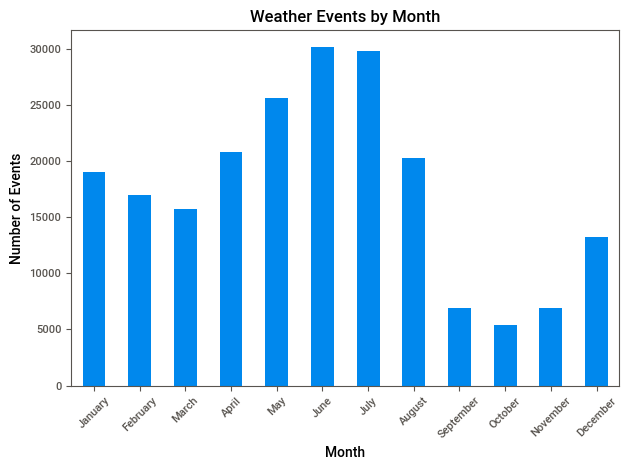

In [89]:
# plot the count of events by month
monthly_counts.plot(kind="bar", title="Weather Events by Month", xlabel="Month", ylabel="Number of Events", rot=45)
plt.tight_layout()
plt.show()

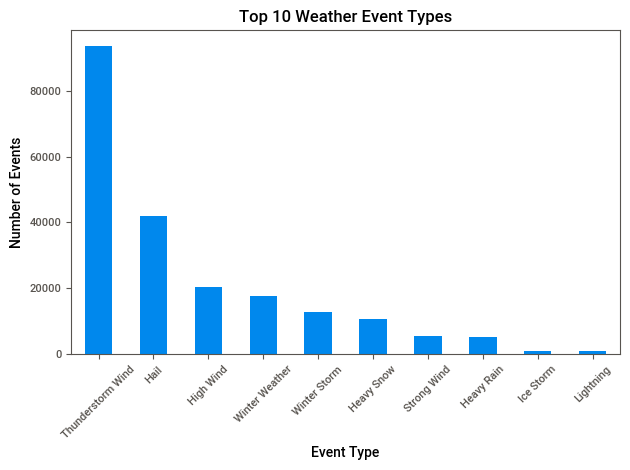

In [90]:
# plot number of events by event type
event_type_counts = filtered_df["EVENT_TYPE"].value_counts()

event_type_counts.head(10).plot(kind="bar", title="Top 10 Weather Event Types", xlabel="Event Type", ylabel="Number of Events", rot=45)
plt.tight_layout()
plt.show()

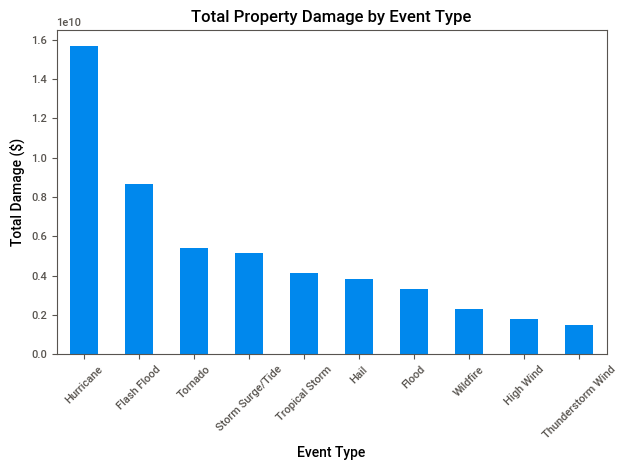

In [91]:
# Show the total property damage by event type
damage_by_event_type = df_all_years.groupby("EVENT_TYPE")["DAMAGE_PROPERTY_NUMERIC"].sum().sort_values(ascending=False)
damage_by_event_type

damage_by_event_type.head(10).plot(kind="bar", title="Total Property Damage by Event Type", xlabel="Event Type", ylabel="Total Damage ($)", rot=45)
plt.tight_layout()
plt.show()

In [92]:
# Filter the dataset for "Thunderstorm Wind"
thunderstorm_wind_df = df_all_years[df_all_years["EVENT_TYPE"] == "Thunderstorm Wind"]

# Group by MONTH_NAME and sum the property damage
damage_by_month = thunderstorm_wind_df.groupby("MONTH_NAME")["DAMAGE_PROPERTY_NUMERIC"].sum().reindex(month_order)

damage_by_month

MONTH_NAME
January       13686610.0
February       6719130.0
March         76903090.0
April         72280450.0
May          231277150.0
June         408305910.0
July         381275790.0
August       230224300.0
September     26226450.0
October       40950050.0
November       8259200.0
December      22717110.0
Name: DAMAGE_PROPERTY_NUMERIC, dtype: float64

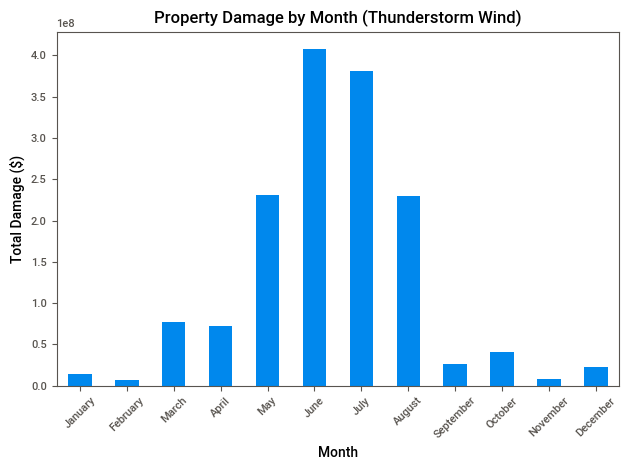

In [93]:
# Show the total property damage by month for Thunderstorm/Wind
damage_by_month.plot(kind="bar", title="Property Damage by Month (Thunderstorm Wind)", xlabel="Month", ylabel="Total Damage ($)", rot=45)
plt.tight_layout()
plt.show()

In [99]:
# Filter for "Thunderstorm Wind" events
hail_df = df_all_years[df_all_years["EVENT_TYPE"] == "Hail"]

# Group by MONTH_NAME and STATE, summing the property damage
damage_by_state_month = hail_df.groupby(["STATE", "MONTH_NAME"])["DAMAGE_PROPERTY_NUMERIC"].sum().unstack().fillna(0)

damage_by_state_month

MONTH_NAME,April,August,December,February,January,July,June,March,May,November,October,September
STATE,,,,,,,,,,,,
ALABAMA,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,0.0,0.000000e+00,0.0,0.0,0.0
ARIZONA,0.0,236500.0,0.0,0.0,30000.0,56000.0,0.0,0.0,0.000000e+00,0.0,0.0,25000.0
ARKANSAS,2152000.0,45000.0,270500.0,96000.0,15000.0,0.0,165000.0,525000.0,2.165000e+06,30000.0,36000.0,0.0
CALIFORNIA,0.0,290000.0,16500.0,0.0,0.0,21000.0,2000.0,20820.0,5.000000e+03,5000.0,0.0,51050.0
COLORADO,0.0,33000.0,0.0,0.0,0.0,19500.0,14500.0,0.0,0.000000e+00,0.0,0.0,3000.0
CONNECTICUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
DELAWARE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
FLORIDA,500600.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
GEORGIA,5810200.0,580020.0,20.0,50000.0,100.0,1140510.0,1900310.0,2000140.0,5.165000e+06,0.0,0.0,0.0


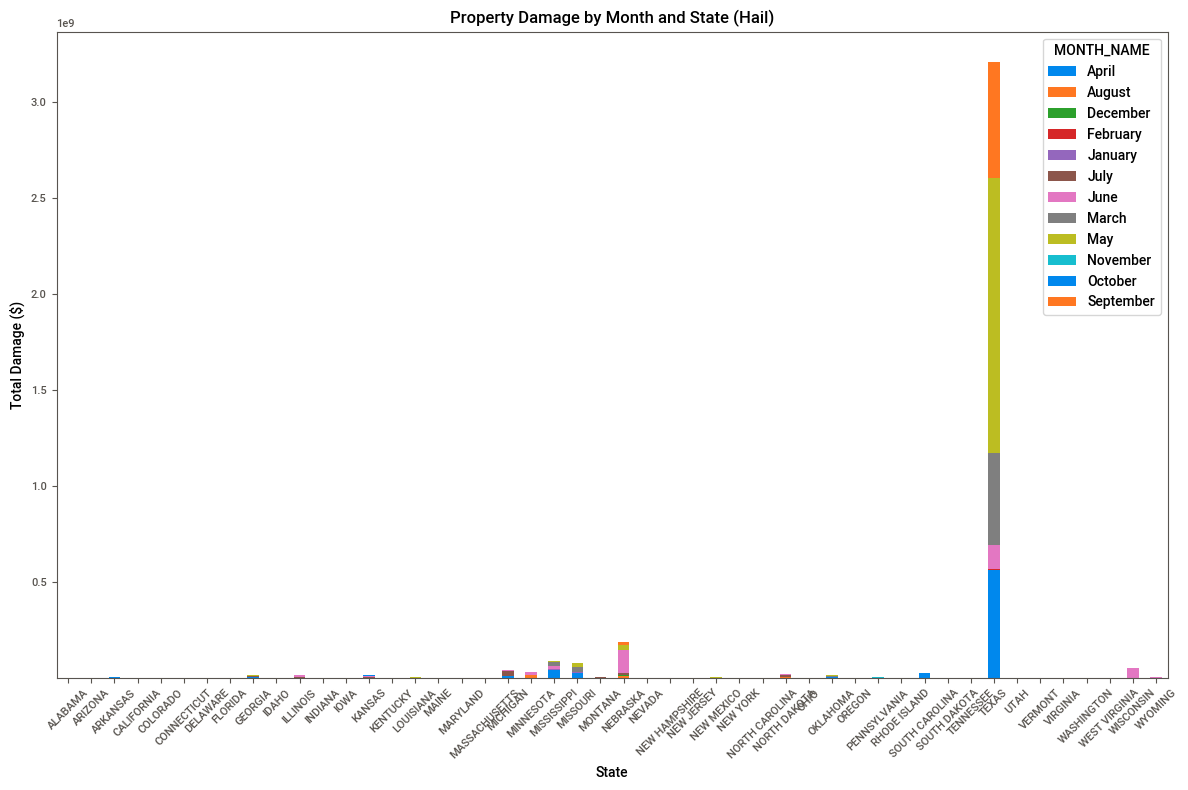

In [100]:
# plot the damage by state and month
damage_by_state_month.plot(kind="bar", stacked=True, figsize=(12, 8), title="Property Damage by Month and State (Hail)", xlabel="State", ylabel="Total Damage ($)", rot=45)
plt.tight_layout()
plt.show()

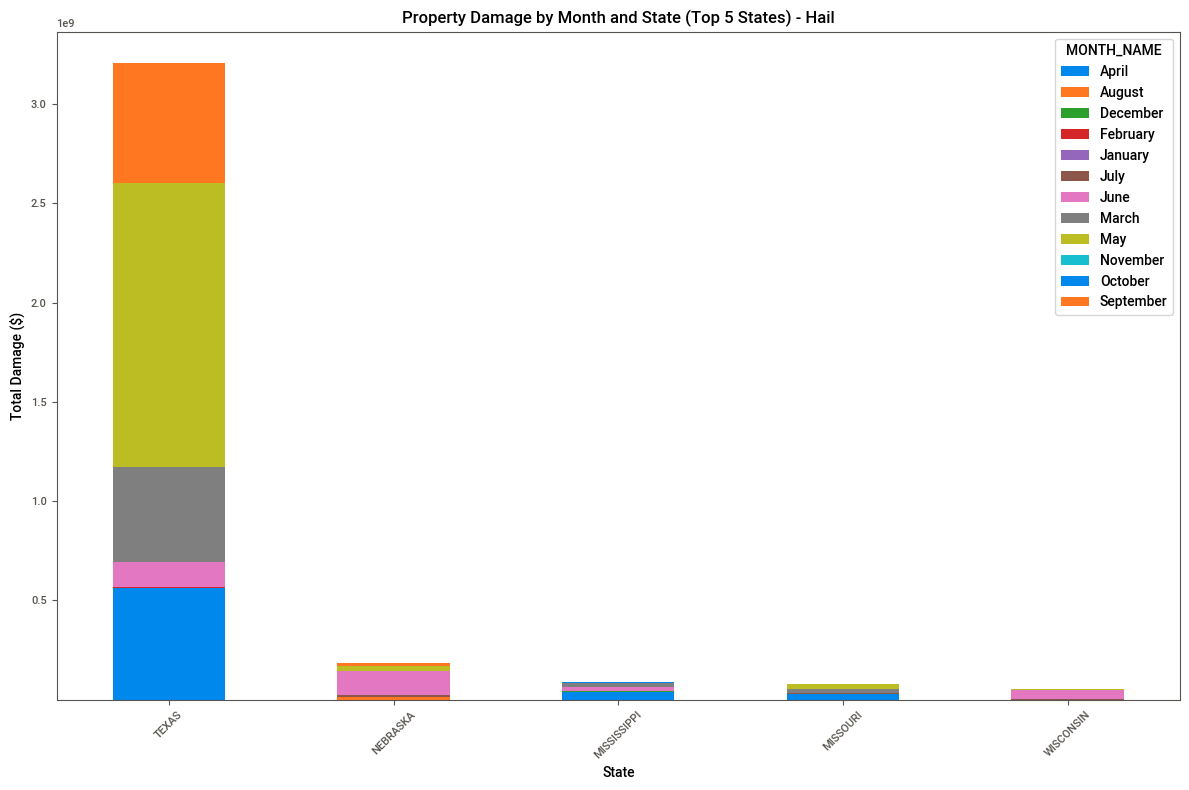

In [101]:
# Sum the damage for each state across all months (this is done by summing across the columns)
state_total_damage = hail_df.groupby("STATE")["DAMAGE_PROPERTY_NUMERIC"].sum()

# Get the top 5 states by total damage
top_5_states = state_total_damage.sort_values(ascending=False).head(5).index

# Now filter the data for the top 5 states
damage_by_state_month = hail_df[hail_df["STATE"].isin(top_5_states)]

# Group by STATE and MONTH_NAME, then sum the property damage
damage_by_state_month = damage_by_state_month.groupby(["STATE", "MONTH_NAME"])["DAMAGE_PROPERTY_NUMERIC"].sum().unstack().fillna(0)

# Plot the stacked bar chart for the top 5 states
damage_by_state_month.loc[top_5_states].plot(kind="bar", stacked=True, figsize=(12, 8), title="Property Damage by Month and State (Top 5 States) - Hail", xlabel="State", ylabel="Total Damage ($)", rot=45)

plt.tight_layout()
plt.show()

Export cleaned data to csv

In [97]:
# Export the cleaned storm data to a CSV file

# Define the output filename
filename = "cleaned_storm_data.csv"

# Join the path and filename
full_output_path = os.path.join(data_path, filename)

# Export the cleaned DataFrame
#filtered_df.to_csv(full_output_path, index=False)

In [98]:
# Export the cleaned housing data to a CSV file

# Define the output filename
housing_filename = "cleaned_housing_data.csv"

# Join the path and filename
housing_full_output_path = os.path.join(data_path, housing_filename)

# Export the cleaned DataFrame
#housing_df_t.to_csv(housing_full_output_path, index=False)